# 내가 닮은 연예인은?


사진 모으기
얼굴 영역 자르기
얼굴 영역 Embedding 추출
연예인들의 얼굴과 거리 비교하기
시각화
회고


1. 사진 모으기


2. 얼굴 영역 자르기
이미지에서 얼굴 영역을 자름
image.fromarray를 이용하여 PIL image로 변환한 후, 추후에 시각화에 사용

In [66]:
# 필요한 모듈 불러오기

import os
import re
import glob

import glob
import pickle
import pandas as pd


import matplotlib.pyplot as plt
import matplotlib.image as img
import face_recognition
%matplotlib inline    
from PIL import Image
import numpy as np

import face_recognition
import os
from PIL import Image




dir_path = os.getenv('HOME')+'/aiffel/EXP_07_face_embedding/data'
file_list = os.listdir(dir_path)

print(len(file_list))

# 이미지 파일 불러오기

print('연예인 이미지 파일 갯수:', len(file_list) - 5) # 추가한 내 사진 수를 뺀 나머지 사진 수 세기

247
연예인 이미지 파일 갯수: 242


In [67]:
# 이미지 파일 리스트 확인

print ("파일 리스트:\n{}".format(file_list))

파일 리스트:
['강인덕.jpg', '김경현.jpg', '고보결.jpg', 'T.O.P.jpg', '김나영.jpg', '길은정.jpg', '고소영.jpg', '강문경.jpg', '강인봉.jpg', '곽진영.jpg', '강성민.jpg', '공승연.jpg', '김민상.jpg', '김규종.jpg', '기도훈.jpg', 'BUMZU.jpg', '고유진.jpg', '김병기.jpg', '곽동연.jpg', '김동희.jpg', '권인하.jpg', '김동률.jpg', '김상경.jpg', 'G-DRAGON.jpg', '권오중.jpg', '강성연.jpg', '김서라.jpg', '김다미.jpg', '김가은.jpg', '김기두.jpg', '강성아.jpg', '고운봉.jpg', '김가희.jpg', '강리나.jpg', '김선호.jpg', '고아라.jpg', '김그림.jpg', '김민희.jpg', '강경준.jpg', '김건모.jpg', '강균성.jpg', '곽지민.jpg', '고경표.jpg', '건지.jpg', '김경호.jpg', '강태오.jpg', '김다솜.jpg', '고윤정.jpg', '강예솔.jpg', '길학미.jpg', '강두리.jpg', '김뢰하.jpg', '권현상.jpg', '강민경.jpg', '곽민석.jpg', '강은탁.jpg', '곽도원.jpg', '김법래.jpg', 'K.WILL.jpg', '김석훈.jpg', '구윤회.jpg', '금보라.jpg', '김갑수.jpg', '김명준.jpg', '강경헌.jpg', '길정우.jpg', '김선혁.jpg', '권성희.jpg', '김고은.jpg', '감우성.jpg', '강소라.jpg', '강승윤.jpg', '경수진.jpg', '김가란.jpg', '강이석.jpg', '공정환.jpg', '김민기.jpg', '김민교.jpg', '강신일.jpg', '권혁수.jpg', '김꽃비.jpg', '김남주.jpg', '곽희성.jpg', '간미연.jpg', '김민석.jpg', '강민아.jpg', 'SE7EN.jpg', '강소리.jpg', '곽정욱.jpg',

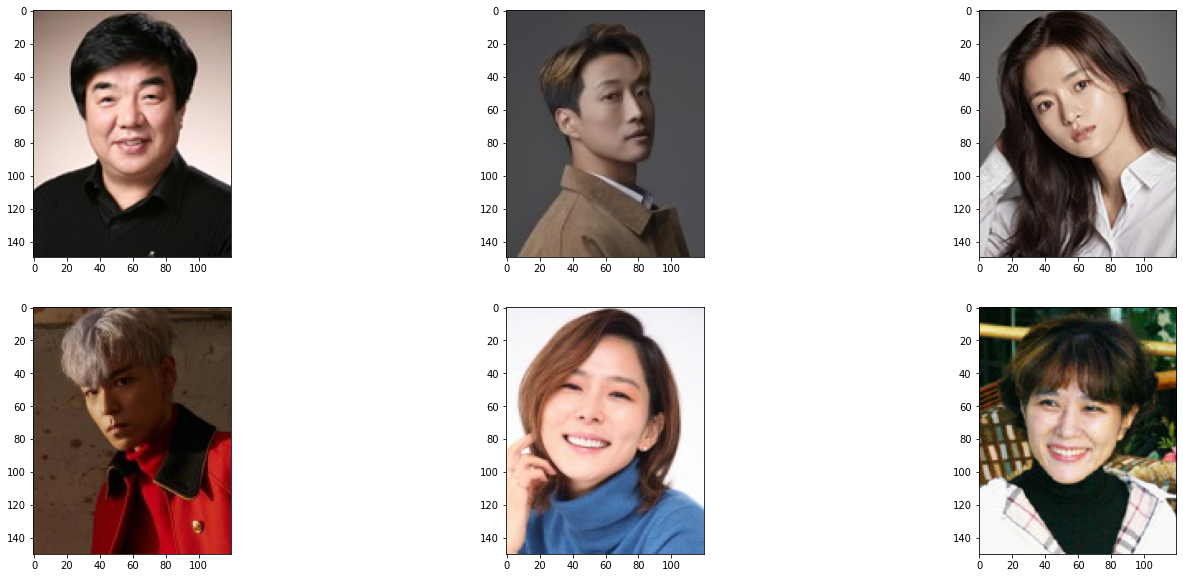

In [68]:
# 이미지 파일 일부 확인

# Set figsize here
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24,10))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
    image = img.imread(dir_path+'/'+file_list[i])
    ax.imshow(image)
plt.show()

fig.tight_layout()

In [69]:

# 이미지 파일 경로를 파라미터로 넘기면 얼굴 영역만 잘라주는 함수

def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

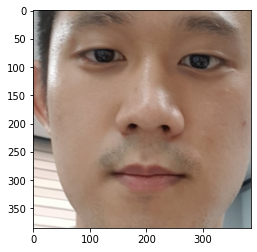

In [70]:
# 얼굴 영역이 정확히 잘리는 지 확인

image_path = os.getenv('HOME')+'/aiffel/EXP_07_face_embedding/data/이원재_02.jpg'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

## Step3. 얼굴 영역의 임베딩 추출하기

In [80]:
# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수

def get_face_embedding(face):
    return face_recognition.face_encodings(face, model='cnn')

In [81]:
# 파일 경로를 넣으면 embedding_dict를 리턴하는 함수

def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        try: 
            img_path = os.path.join(dir_path, file)
            face = get_cropped_face(img_path)
            embedding = get_face_embedding(face)
            if len(embedding) > 0:  
            # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
            # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
                embedding_dict[os.path.splitext(file)[0]] = embedding[0]
                #  embedding_dict[] 이미지 파일의 임베딩을 구해 담음 키=사람이름, 값=임베딩 벡터
                #  os.path.splitext(file)[0] 파일의 확장자를 제거한 이름만 추출
                #  embedding[0]은 넣고 싶은 요소값

        except:
            continue
            
    return embedding_dict

In [82]:
embedding_dict = get_face_embedding_dict(dir_path)

## Step4. 모은 연예인들과 비교하기

In [83]:
# 이미지 간 거리를 구하는 함수

def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

In [84]:
# 본인 사진의 거리를 확인해보자

print('내 사진끼리의 거리는?:', get_distance('이원재_01', '이원재_02'))

내 사진끼리의 거리는?: 0.27525162596989655


In [85]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.

def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

In [86]:

# 닮은꼴 순위, 이름, 임베딩 거리를 포함한 Top-5 리스트 출력하는 함수

def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    rank_cnt = 1 # 순위를 세는 변수
    pass_cnt = 1 # 건너뛴 숫자를 세는 변수(본인 사진 카운트)
    end = 0      # 닮은 꼴 5번 출력시 종료하기 위해 세는 변수
    for i in range(top+15):
        rank_cnt += 1
        if sorted_faces[i][0].find('이원재_02') == 0:  # 본인 사진인 mypicture라는 파일명으로 시작하는 경우 제외합니다.
            pass_cnt += 1
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(rank_cnt - pass_cnt, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
            end += 1
        if end == 5: # end가 5가 된 경우 연예인 5명 출력되었기에 종료합니다.
            break

In [87]:
# '이원재_01'과 가장 닮은 사람은 누굴까요?

get_nearest_face('이원재_01')

순위 1 : 이름(이원재_01), 거리(0.0)
순위 2 : 이름(euPhemia), 거리(0.39785575251289035)
순위 3 : 이름(공명), 거리(0.43181500298337777)
순위 4 : 이름(강기영), 거리(0.44559566211978)
순위 5 : 이름(JK김동욱), 거리(0.4560282622605789)


In [88]:
# '이원재_02'와 가장 닮은 사람은 누굴까요?

get_nearest_face('이원재_02')

순위 1 : 이름(이원재_01), 거리(0.27525162596989655)
순위 2 : 이름(euPhemia), 거리(0.38568278214648233)
순위 3 : 이름(공명), 거리(0.445581489047543)
순위 4 : 이름(김동완), 거리(0.44765017085662295)
순위 5 : 이름(강성필), 거리(0.4536061116328271)


## Step5. 다양한 재미있는 시각화 시도해 보기

In [100]:

# 사진 경로 설정

mypicture1 = os.getenv('HOME')+'/aiffel/EXP_07_face_embedding/data/이원재_01.jpg'
mypicture2 = os.getenv('HOME')+'/aiffel/EXP_07_face_embedding/data/이원재_02.jpg'

mc= os.getenv('HOME')+'/aiffel/EXP_07_face_embedding/data/MC몽.jpg'
gahee = os.getenv('HOME')+'/aiffel/EXP_07_face_embedding/data/가희.jpg'
seven = os.getenv('HOME')+'/aiffel/EXP_07_face_embedding/data/SE7EN.jpg'
gam = os.getenv('HOME')+'/aiffel/EXP_07_face_embedding/data/감우성.jpg'

gang = os.getenv('HOME')+'/aiffel/EXP_07_face_embedding/data/강경준.jpg'
gyung = os.getenv('HOME')+'/aiffel/EXP_07_face_embedding/data/강경현.jpg'
gi = os.getenv('HOME')+'/aiffel/EXP_07_face_embedding/data/강기영.jpg'

In [102]:

# 크롭한 얼굴을 저장해 보자

a1 = get_cropped_face(mypicture1)
a2 = get_cropped_face(mypicture2)

b1 = get_cropped_face(mc)
b2 = get_cropped_face(gahee)
b3 = get_cropped_face(gam)

mypicture의 순위
순위 1 : 이름(사쿠라), 거리(0.36107689719729225)
순위 2 : 이름(트와이스나연), 거리(0.36906292012955577)  
순위 3 : 이름(아이유), 거리(0.3703590842312735)  
순위 4 : 이름(유트루), 거리(0.3809516850126146)  
순위 5 : 이름(지호), 거리(0.3886670633997685)


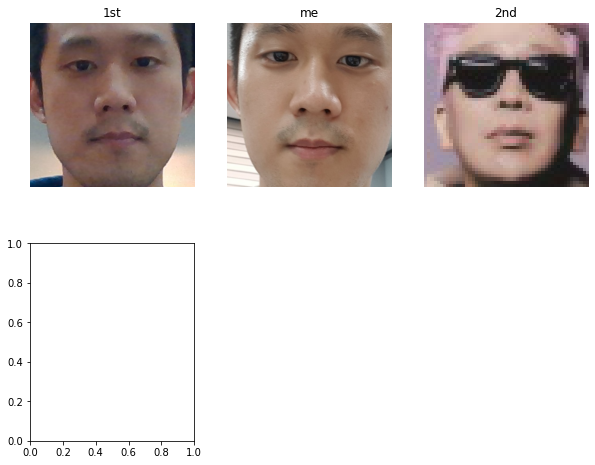

In [104]:
plt.figure(figsize=(10,8))

plt.subplot(231)
plt.imshow(a1)
plt.axis('off')
plt.title('1st')
plt.subplot(232)
plt.imshow(a2)
plt.axis('off')
plt.title('me')
plt.subplot(233)
plt.imshow(b1)
plt.axis('off')
plt.title('2nd')
plt.subplot(234)

print('''mypicture의 순위
순위 1 : 이름(사쿠라), 거리(0.36107689719729225)
순위 2 : 이름(트와이스나연), 거리(0.36906292012955577)  
순위 3 : 이름(아이유), 거리(0.3703590842312735)  
순위 4 : 이름(유트루), 거리(0.3809516850126146)  
순위 5 : 이름(지호), 거리(0.3886670633997685)''')